In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
n_input_features=20
n_input_samples=500
input_feature_matrix=(np.concatenate([np.ones((n_input_samples,1)),np.random.rand(n_input_samples,n_input_features-1)],axis=1))
true_coefs=10*np.random.rand(n_input_features,1)
y_op=input_feature_matrix@true_coefs
y_op=y_op+0.3*np.random.randn(y_op.shape[0],y_op.shape[1])

In [3]:
x_train,x_test=train_test_split(input_feature_matrix,test_size=0.2,random_state=50)
y_train,y_test=train_test_split(y_op,test_size=0.2,random_state=50)

In [12]:
class simple_lin_reg(nn.Module):
    def __init__(self,in_dims,out_dims):
        super(simple_lin_reg,self).__init__()
        self.linear=nn.Linear(in_dims,out_dims)
    def forward(self,x):
        y_pred=self.linear(x)
        return(y_pred)
model=simple_lin_reg(x_train.shape[1],1)

In [14]:
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(x_train[:,1:])
X_test_norm=scaler.transform(x_test[:,1:])
X_train_norm_m=np.concatenate([np.ones((X_train_norm.shape[0],1)),X_train_norm],axis=1)
X_test_norm_m=np.concatenate([np.ones((X_test_norm.shape[0],1)),X_test_norm],axis=1)
train_tensor=torch.tensor(X_train_norm_m,requires_grad=True,dtype=torch.float32)
train_targets=torch.tensor(y_train,requires_grad=True,dtype=torch.float32)
test_tensor=torch.tensor(X_test_norm_m,dtype=torch.float32)
test_targets=torch.tensor(y_test,dtype=torch.float32)

Epoch:0 Train_loss:3042.26, Val_loss:2789.41
Epoch:3 Train_loss:2678.61, Val_loss:2544.52
Epoch:6 Train_loss:2374.15, Val_loss:2328.52
Epoch:9 Train_loss:2099.30, Val_loss:2077.05
Epoch:12 Train_loss:1838.22, Val_loss:1793.94
Epoch:15 Train_loss:1594.70, Val_loss:1519.28
Epoch:18 Train_loss:1375.21, Val_loss:1287.47
Epoch:21 Train_loss:1178.82, Val_loss:1100.11
Epoch:24 Train_loss:1001.16, Val_loss:937.99
Epoch:27 Train_loss:841.93, Val_loss:791.27
Epoch:30 Train_loss:702.16, Val_loss:661.77
Epoch:33 Train_loss:580.41, Val_loss:549.48
Epoch:36 Train_loss:474.87, Val_loss:450.13
Epoch:39 Train_loss:384.33, Val_loss:360.38
Epoch:42 Train_loss:307.64, Val_loss:282.97
Epoch:45 Train_loss:243.49, Val_loss:221.59
Epoch:48 Train_loss:190.30, Val_loss:173.97
Epoch:51 Train_loss:146.77, Val_loss:135.21
Epoch:54 Train_loss:111.62, Val_loss:102.63
Epoch:57 Train_loss:83.60, Val_loss:76.18
Epoch:60 Train_loss:61.62, Val_loss:55.68
Epoch:63 Train_loss:44.61, Val_loss:40.00
Epoch:66 Train_loss:31.66

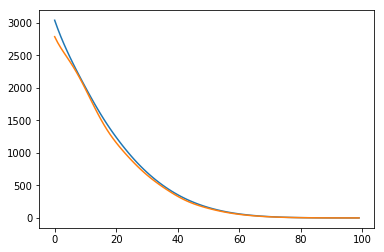

In [15]:
epochs=100
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.5)
running_train_loss=[]
running_test_loss=[]
for i in range(epochs):
    y_pred=model(train_tensor)
    loss=criterion(y_pred,train_targets)
    loss.backward()
    running_train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
    y_pred_val=model(test_tensor)
    loss_val=criterion(y_pred_val,test_targets)
    running_test_loss.append(loss_val)
    if(i%3==0):
        print(f'Epoch:{i} Train_loss:{loss.item():0.2f}, Val_loss:{loss_val.item():0.2f}')

    
plt.plot(range(epochs),running_train_loss,range(epochs),running_test_loss)




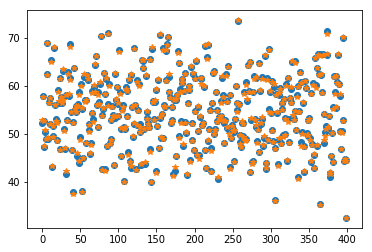

In [16]:
train_preds=model(train_tensor)
plt.plot(range(train_preds.shape[0]),y_train,'o',train_preds.detach().numpy(),'*')

In [ ]:
test_preds=model(test_tensor)
plt.plot(range(test_preds.shape[0]),y_test,'o',test_preds.detach().numpy(),'*')